# CAPSTONE PROJECT - COURSERA
## HOSPITALS IN HYDERBAD

In [84]:
#HYDERBAD CENTER LATITUDE AND LONGITUDE
LATITUDE = '17.3850'
LONGITUDE = '78.4867'


### plotting hyderbad

In [42]:

!pip install folium
import folium

hospital_map = folium.Map(location = [LATITUDE, LONGITUDE], zoom_start = 13)


hospital_map = folium.Map(location = [LATITUDE, LONGITUDE], zoom_start = 10)
folium.Marker([LATITUDE, LONGITUDE]).add_to(hospital_map)
hospital_map

In [43]:
#Foursquare API details
CLIENT_ID = 'Client_id'
CLIENT_SECRET = 'Client_secret'
VERSION = 'todays date'

In [44]:
#LIBRARIES IMPORTING
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests
pd.set_option('display.max_rows', None)

### FETCHING DATA FROM API

In [45]:
venues_list = []
search_query = 'hospitals'
radius = 100000
venues = 5000
offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng','address'])
while(True):
    url = "https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&offset={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        LATITUDE,
        LONGITUDE,
        search_query,
        radius, 
        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['venues'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, radius/1000))

    venues = result['response']['venues']
    venues = json_normalize(venues)

    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

Total 30 venues fetched within a total radius of 100.0 Km


In [46]:
venues.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.postalCode', 'location.state', 'name', 'referralId'],
      dtype='object')

#### DROPPING UNWANTED COLUMNS IN VENUE DATA

In [47]:
venues.drop(['hasPerk','location.labeledLatLngs','location.distance','location.cc','location.city','location.state','location.country','location.postalCode','location.crossStreet','referralId','categories'],axis =1,inplace = True)

#### RENAMING  SOME COLUMN NAMES

In [48]:
venues.rename(columns={'location.address':'address','location.formattedAddress':'formattedaddress','location.lat':'lat','location.lng':'lng'},inplace=True)
venues.head(1)

,id,address,formattedaddress,lat,lng,name
0,525cecb0498e4af6ab65c5b3,Nampally,"[Nampally, India]",17.385735,78.480819,Care Hospitals


###### IF ADDRESS HAVE NaN VALUE REPLACE IT WITH FORMATTEDADDRESS VALUE

In [49]:
venues = venues.reindex(columns= ['id','name','lat','lng','address','formattedaddress'])
venues.loc[venues['address'].isna(),'address'] = venues['formattedaddress']

### PLOTTING VENUES DATA IN MAP

In [50]:
hospital_map = folium.Map(location = [LATITUDE, LONGITUDE], zoom_start = 13)

for name, latitude, longitude, address in zip(venues['name'], venues['lat'], venues['lng'],venues['address']):
    label = '{},{}'.format(name,address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(hospital_map)  


hospital_map

In [51]:
venues.drop('id',axis= 1,inplace=True)

In [52]:
venues.head()

,name,lat,lng,address,formattedaddress
0,Care Hospitals,17.385735,78.480819,Nampally,"[Nampally, India]"
1,Bristlecone Hospitals,17.393121,78.494260,Barkatpura,"[Barkatpura, India]"
2,Paradise Dental Hospitals,17.396124,78.491379,"Flat No 101 B, 1st Floor, Guru Partha Estates,","[Flat No 101 B, 1st Floor, Guru Partha Estates..."
3,Fernandez Hospitals Unit 4,17.398560,78.481450,hyderguda,"[hyderguda (old mla quarters), Hyderabad 50004..."
4,"Government Maternity Hospital,sultan Bazar",17.386003,78.487206,[India],[India]


In [85]:
#NAME OF ALL HOSPITALS
venues['name']

0                                        Care Hospitals
1                                 Bristlecone Hospitals
2                             Paradise Dental Hospitals
3                            Fernandez Hospitals Unit 4
4            Government Maternity Hospital,sultan Bazar
5                                     Maxcure Hospitals
6                             Dugabai Deshmuk Hospitals
7                  AP Super Speciality Dental Hospitals
8                                       alpha hospitals
9                          Global Hospitals Lakadikapul
10               lotus hospitals for women and children
11                                   Viranchi Hospitals
12                                     global hospitals
13                         CARE Hospitals Ladies Hostel
14                             Maxivision Eye Hospitals
15                                       axon hospitals
16             Cafeteria, care hospitals, banjara hills
17                       Global hospitals corpor

### IMPORTING DATA SET


In [54]:
##I DID MY PROJECT IN WATSON STUDIO ,SO THIS IS FOR IMPORTING IN WATSON STUDIO ,YOU CAN USE YOUR REGULAR IMPORTING CODE  
body = client_27c32e3df09740d3a607f4f8e98d5f5b.get_object(Bucket='capstone-donotdelete-pr-oiulrdxbqmes1c',Key='Book1.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)



In [86]:
#SOME DATA CLEANING
df['address'][4] = "[India]"
df['address'][5] = "[Hyderabad 500063, Telangana, India]"
df.rename(columns={'Name':'name'},inplace=True)
df.head(6)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,name,address,ratings,contact details
0,Care Hospitals,Nampally,4.1,"040 67256666 , 9866390032"
1,Bristlecone Hospitals,Barkatpura,4.5,"040 45999999 , 9885004340"
2,Paradise Dental Hospitals,"Flat No 101 B, 1st Floor, Guru Partha Estates",4.3,"040 42616545 , 9494228286"
3,Fernandez Hospitals Unit 4,hyderguda,4.5,040 40632400
4,"Government Maternity Hospital,sultan Bazar",[India],3.9,040 24653422
5,Maxcure Hospitals,"[Hyderabad 500063, Telangana, India]",4.1,"040 49404940 , 7331148853"


In [56]:
venues.head()

,name,lat,lng,address,formattedaddress
0,Care Hospitals,17.385735,78.480819,Nampally,"[Nampally, India]"
1,Bristlecone Hospitals,17.393121,78.494260,Barkatpura,"[Barkatpura, India]"
2,Paradise Dental Hospitals,17.396124,78.491379,"Flat No 101 B, 1st Floor, Guru Partha Estates,","[Flat No 101 B, 1st Floor, Guru Partha Estates..."
3,Fernandez Hospitals Unit 4,17.398560,78.481450,hyderguda,"[hyderguda (old mla quarters), Hyderabad 50004..."
4,"Government Maternity Hospital,sultan Bazar",17.386003,78.487206,[India],[India]


##### MAKING A DUPLICATE OF TABLES FOR SAFETY USE

In [57]:
venues_copy = venues.copy()
df_copy = df.copy()


### MERGING BOTH DATAs MAKING NAME OF HOSPITAL AS COMMON COLUMN IN BOTH TABLES

In [58]:
new = pd.merge(venues,df,on='name')

In [59]:
new.columns

Index(['name', 'lat', 'lng', 'address_x', 'formattedaddress', 'address_y',
       'ratings', 'contact details'],
      dtype='object')

In [65]:
#DATA CLEANING 
new.drop(['address_y','formattedaddress'],axis=1,inplace=True)
new.rename(columns ={'address_x':'address'},inplace= True)
new.shape
new.head()

,name,lat,lng,address,ratings,contact details
0,Care Hospitals,17.385735,78.480819,Nampally,4.1,"040 67256666 , 9866390032"
1,Care Hospitals,17.412716,78.450325,"[Hyderabad, Telangana, India]",4.1,"040 67256666 , 9866390032"
2,Bristlecone Hospitals,17.393121,78.494260,Barkatpura,4.5,"040 45999999 , 9885004340"
3,Paradise Dental Hospitals,17.396124,78.491379,"Flat No 101 B, 1st Floor, Guru Partha Estates,",4.3,"040 42616545 , 9494228286"
4,Fernandez Hospitals Unit 4,17.398560,78.481450,hyderguda,4.5,040 40632400


### PLOTTING THE NEW DATA IN MAP

In [61]:
hospital_map = folium.Map(location = [LATITUDE, LONGITUDE], zoom_start = 13)

for name, latitude, longitude,rating,add in zip(new['name'], new['lat'],new['lng'],new['ratings'],new['address']):
    label = '{},{},{}'.format(name,add,rating)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(hospital_map)  


hospital_map

In [62]:
new_copy =new.copy()

#### ANALYSING THE DATA

In [87]:
#DIVIDING THE HOSPITALS WITH RATIGS AS KEYTERM AND CREATING 3 DIFFRENT TABLES USING THIS DIVISION
a1 = 0
a2 =0
a3 = 0
for a in new['ratings']:
    if a >= 4:
        a1 += 1
        
    elif a>=3:
        a2 += 1
    else:
        a3 += 1
good = new.loc[new['ratings']>=4]
avg = new[(new['ratings']>=3) & (new['ratings']< 4)]
bad = new.loc[new['ratings']<3]
print(a1,a2,a3)

13 8 1


### PLOTTING HOSPITALS WITH DIFFERENT COLOURS 

In [69]:
hospital_map = folium.Map(location = [LATITUDE, LONGITUDE], zoom_start = 13)

for name, latitude, longitude,rating,add in zip(good['name'], good['lat'],good['lng'],good['ratings'],good['address']):
    label = '{},{},{}'.format(name,add,rating)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 1,
        parse_html = False).add_to(hospital_map)  
for name, latitude, longitude,rating,add in zip(avg['name'], avg['lat'],avg['lng'],avg['ratings'],avg['address']):
    label = '{},{},{}'.format(name,add,rating)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'orange',
        fill = True,
        fill_color = '#ff9f00',
        fill_opacity = 1,
        parse_html = False).add_to(hospital_map)  
for name, latitude, longitude,rating,add in zip(bad['name'], bad['lat'],bad['lng'],bad['ratings'],bad['address']):
    label = '{},{},{}'.format(name,add,rating)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#e34234',
        fill_opacity = 1,
        parse_html = False).add_to(hospital_map)  

hospital_map

Text(0, 0.5, 'number of hospitals')

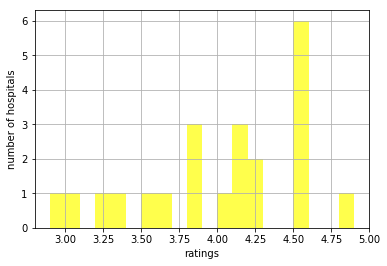

In [83]:
ax  =new['ratings'].hist(bins = 20,alpha= 0.7 ,color = 'yellow')
ax.set_xlabel('ratings')
ax.set_ylabel('number of hospitals')